In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("patrickfleith/nasa-battery-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\sohal\.cache\kagglehub\datasets\patrickfleith\nasa-battery-dataset\versions\2


In [50]:
import os

##  Visualising and knowing our dataset  ##


# Path to the dataset folder
dataset_path = r'C:\Users\sohal\.cache\kagglehub\datasets\patrickfleith\nasa-battery-dataset\versions\2'

# List files in the directory
files = os.listdir(dataset_path)
print("Files in the dataset folder:")
print(files)


# Path to the cleaned_dataset folder
cleaned_dataset_path = os.path.join(dataset_path, 'cleaned_dataset')

# List files in the cleaned_dataset folder
cleaned_files = os.listdir(cleaned_dataset_path)
print("Files in the cleaned_dataset folder:")
print(cleaned_files)


# Path to the data folder
data_folder_path = os.path.join(cleaned_dataset_path, 'data')

# Check if 'data' is a folder and list its contents
if os.path.isdir(data_folder_path):
    data_files = os.listdir(data_folder_path)
    print("Files in the 'data' folder:")
    #print(data_files)
else:
    print("'data' is not a folder or does not exist.")



# Path to the metadata.csv file
metadata_path = os.path.join(cleaned_dataset_path, 'metadata.csv')

# Load the metadata.csv file
metadata = pd.read_csv(metadata_path)

# Display the first few rows of the metadata
print("Metadata:")
print(metadata.head())    


# Path to the extra_infos folder
extra_infos_path = os.path.join(cleaned_dataset_path, 'extra_infos')

# Check if 'extra_infos' is a folder and list its contents
if os.path.isdir(extra_infos_path):
    extra_files = os.listdir(extra_infos_path)
    print("Files in the 'extra_infos' folder:")
    print(extra_files)
else:
    print("'extra_infos' is not a folder or does not exist.")

Files in the dataset folder:
['cleaned_dataset']
Files in the cleaned_dataset folder:
['data', 'extra_infos', 'metadata.csv']
Files in the 'data' folder:
Metadata:
        type                                         start_time  \
0  discharge  [2010.       7.      21.      15.       0.    ...   
1  impedance  [2010.       7.      21.      16.      53.    ...   
2     charge  [2010.       7.      21.      17.      25.    ...   
3  impedance                    [2010    7   21   20   31    5]   
4  discharge  [2.0100e+03 7.0000e+00 2.1000e+01 2.1000e+01 2...   

   ambient_temperature battery_id  test_id  uid   filename  \
0                    4      B0047        0    1  00001.csv   
1                   24      B0047        1    2  00002.csv   
2                    4      B0047        2    3  00003.csv   
3                   24      B0047        3    4  00004.csv   
4                    4      B0047        4    5  00005.csv   

             Capacity                   Re                  

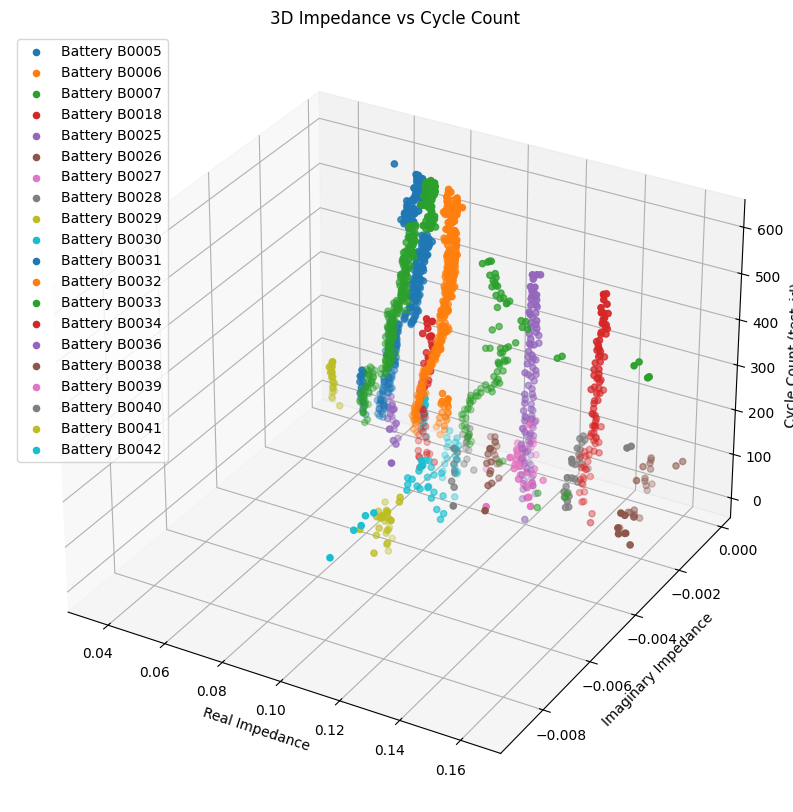

In [100]:

impedance_folder = data_folder_path  # Folder where impedance files are stored
#print(impedance_folder)

# Filter impedance type rows
impedance_metadata = metadata[metadata["type"] == "impedance"]


# Group by battery_id and extract relevant columns
battery_groups = impedance_metadata.groupby("battery_id")[["filename", "test_id"]]

# Initialize plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')


i=0
# Loop through each battery_id group
for battery_id, group in battery_groups:
    i=i+1
    real_vals, imag_vals, cycle_counts = [], [], []

    for _, row in group.iterrows():
     
        file_path = os.path.join(data_folder_path, row["filename"].strip())  # Get full file path
        file_name = row["filename"].strip()

        if os.path.exists(file_path):
            df = pd.read_csv(file_path)
           
           # Load impedance data
            
            # Extract impedance column (assuming it's named 'rectified_impedance')
            if "Rectified_Impedance" in df.columns:
                mean_real = df["Rectified_Impedance"].apply(lambda x: np.real(complex(x))).mean()
                mean_imag = df["Rectified_Impedance"].apply(lambda x: np.imag(complex(x))).mean()  # Compute mean impedance
                real_vals.append(mean_real)
                imag_vals.append(mean_imag)
                group_df = battery_groups.get_group(battery_id)  # Convert group object to DataFrame

                test_id = group[group["filename"] == file_name]["test_id"].iloc[0]
                cycle_counts.append(test_id)


    # Scatter plot for this battery_id
  
   # print(cycle_counts)
   # print("xxxxxxxxxxxxxxxxxxxxxxxxx")
    ax.scatter(real_vals, imag_vals, cycle_counts, label=f"Battery {battery_id}")
    if(i==20): # for better visualisation and less noise I am taking only first 20 Battery
        break

# Label axes
ax.set_xlabel("Real Impedance")
ax.set_ylabel("Imaginary Impedance")
ax.set_zlabel("Cycle Count (test_id)")
ax.set_title("3D Impedance vs Cycle Count")

# Show legend and plot
ax.legend()
plt.show()




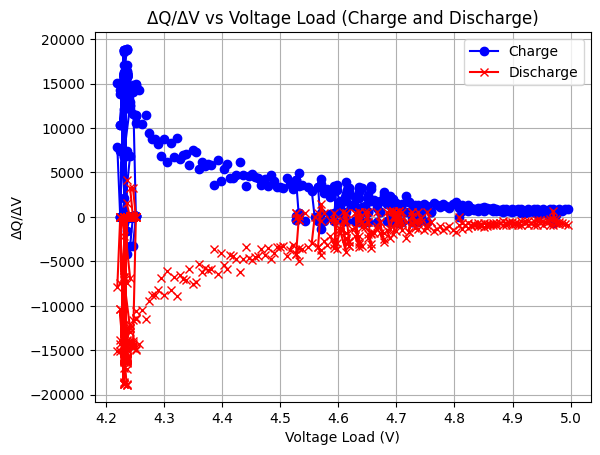

In [138]:
import os
import pandas as pd

# Sample charge and discharge metadata
charge_metadata = metadata[metadata["type"] == "charge"]
discharge_metadata = metadata[metadata["type"] == "discharge"]

# Select a random row
random_row_charge = charge_metadata.sample(n=1)
random_row_discharge = discharge_metadata.sample(n=1)

#DATAFRAME EXTRACTION FOR CHARGING
file_path_ch = os.path.join(data_folder_path, random_row_charge["filename"].iloc[0].strip())  # Get full file path
df_ch = pd.read_csv(file_path_ch)

df_ch['Charge'] = df_ch['Current_charge'] * df_ch['Time']  # Q = I * t

df_ch['Delta_Charge'] = df_ch['Charge'].diff()  # Difference between consecutive charges
df_ch['Delta_Voltage'] = df_ch['Voltage_charge'].diff()  # Difference between consecutive voltages

df_ch['Del_Q_Del_V'] = df_ch['Delta_Charge'] / df_ch['Delta_Voltage']

#DATAFRAME EXTRACTION FOR DISCHARGING
file_path_dis = os.path.join(data_folder_path, random_row_discharge["filename"].iloc[0].strip())  # Get full file path
df_dis = pd.read_csv(file_path_ch)

df_dis['Charge'] = df_dis['Current_charge'] * df_dis['Time']  # Q = I * t

df_dis['Delta_Charge'] = df_dis['Charge'].diff()  # Difference between consecutive charges
df_dis['Delta_Voltage'] = df_dis['Voltage_charge'].diff()  # Difference between consecutive voltages

df_dis['Del_Q_Del_V'] = -1* df_dis['Delta_Charge'] / df_ch['Delta_Voltage']


plt.plot(df_ch['Voltage_charge'][1:], df_ch['Del_Q_Del_V'][1:], marker='o', linestyle='-', color='b', label='Charge')
# Plot for discharge
plt.plot(df_dis['Voltage_charge'][1:], df_dis['Del_Q_Del_V'][1:], marker='x', linestyle='-', color='r', label='Discharge')

# Labels and title
plt.title("ΔQ/ΔV vs Voltage Load (Charge and Discharge)")
plt.xlabel("Voltage Load (V)")
plt.ylabel("ΔQ/ΔV")
plt.grid(True)
plt.legend()

# Show the plot
plt.show()



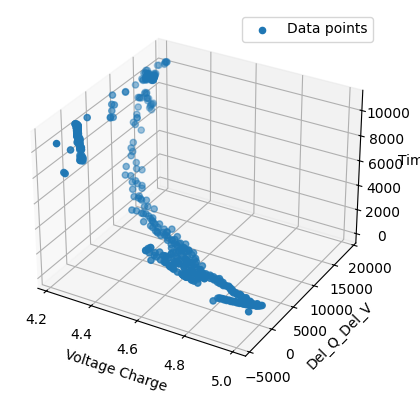

In [156]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.scatter(df_ch['Voltage_charge'][1:], df_ch['Del_Q_Del_V'][1:], df_ch['Time'][1:])

ax.set_xlabel('Voltage Charge')
ax.set_ylabel('Del_Q_Del_V')
ax.set_zlabel('Time')


ax.legend(['Data points'])

# Show the plot
plt.show()


Model R^2 score:  0.6486856783836479
Predictions on the test set:  [1.65010024 1.58183028 1.5170969  1.30446164 1.61630305 1.40538102
 1.70910739 1.37561552 1.42400534 1.4656492 ]


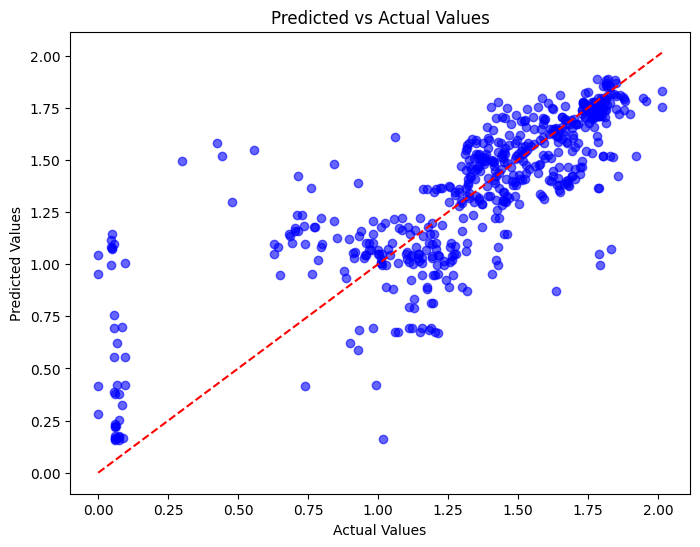

In [148]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


features = ['ambient_temperature', 'test_id', 'Re', 'Rct']
metadata = metadata[features + ['Capacity']]  # Keep features and target column 'Capacity'

metadata = metadata.apply(pd.to_numeric, errors='coerce')


metadata.fillna(metadata.median(), inplace=True)


X = metadata.drop(columns=['Capacity'])  # Drop the target column
y = metadata['Capacity']  # Target variable

y.fillna(y.median(), inplace=True)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


print("Model R^2 score: ", model.score(X_test, y_test))

print("Predictions on the test set: ", y_pred[:10])

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title("Predicted vs Actual Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()